<a href="https://colab.research.google.com/github/2303a52365/AIML_2303a52365/blob/main/AIML_LABEXAM_SET_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)


In [25]:
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]  # Selecting important columns
data.dropna(inplace=True)  # Dropping rows with missing values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encoding 'Sex'
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encoding 'Embarked'


<ipython-input-25-624f3de802e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Dropping rows with missing values
<ipython-input-25-624f3de802e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encoding 'Sex'
<ipython-input-25-624f3de802e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [26]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



1. Implement Random Forest Classifier


In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [29]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.7692307692307693


2. Compare with a Single Decision Tree


In [30]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)



Decision Tree Accuracy: 0.6993006993006993


3. Feature Importance



In [32]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)



Feature Importances:
    Feature  Importance
2       Age    0.276733
1       Sex    0.259011
5      Fare    0.251045
0    Pclass    0.105853
3     SibSp    0.048870
4     Parch    0.035158
6  Embarked    0.023330


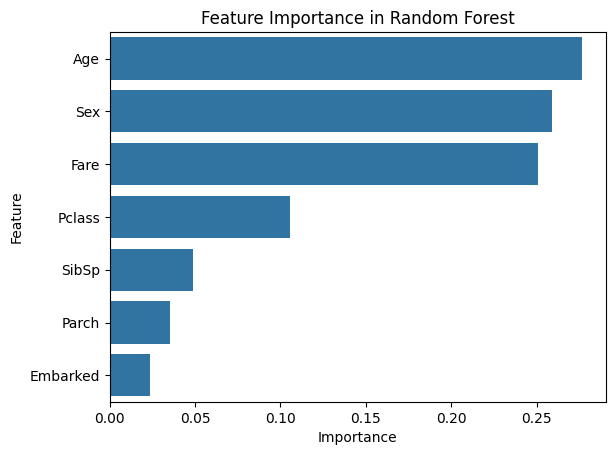

In [33]:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Random Forest")
plt.show()


 4. Visualize Out-of-Bag (OOB) Error


In [34]:
oob_error = 1 - rf_model.oob_score_
print("Out-of-Bag (OOB) Error:", oob_error)


Out-of-Bag (OOB) Error: 0.21792618629173988


5. Confusion Matrix and F1-Score


In [35]:
conf_matrix = confusion_matrix(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)


In [36]:
print("\nConfusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[66 14]
 [19 44]]


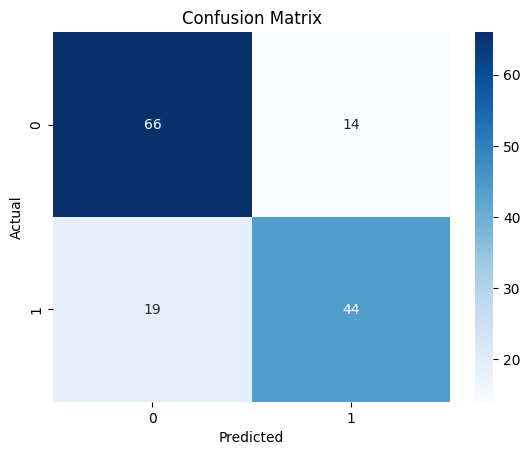

In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
